In [1]:
!pip3 install torch

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(42)

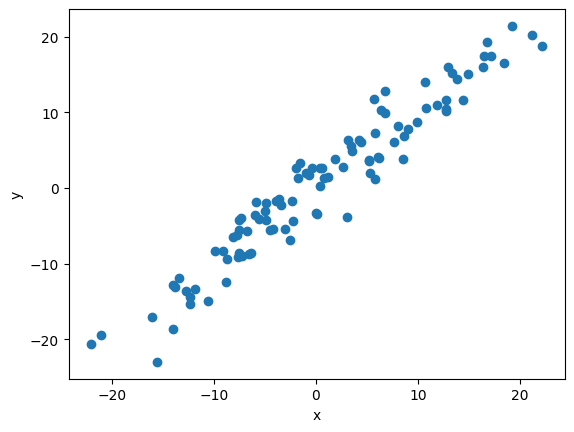

In [3]:
X = torch.randn(100,1)*10
y = X + 3*torch.randn(100,1) #adding noise
plt.plot(X.numpy(),y.numpy(),'o')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [4]:
class LR(nn.Module):

  def __init__(self, input_size,output_size):
    super().__init__()
    self.linear = nn.Linear(input_size,output_size)

  def forward(self,x):
    return self.linear(x)


In [5]:

model = LR(1,1)

In [6]:
[w,b] = model.parameters()
def get_params():
  return w[0][0].item(),b[0].item()


In [7]:
def plot_fit(title):
  plt.title(title)
  w1,b1 = get_params()
  x1 = np.array([-30,30])
  y1 = w1*x1 + b1
  plt.plot(x1 , y1 , 'r')
  plt.scatter(X , y)
  plt.show()

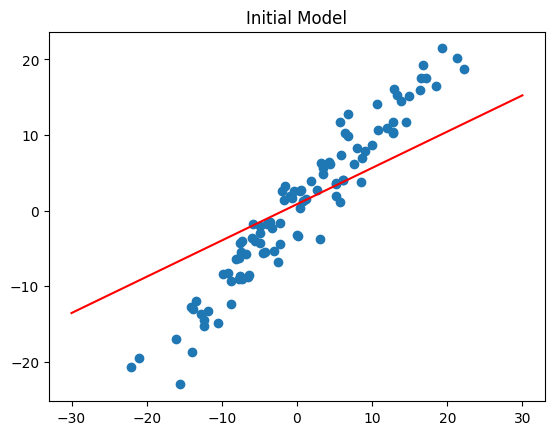

In [8]:
plot_fit('Initial Model')

In [9]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters() , lr = 0.01)

In [10]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred , y)
  print(f'epoch: {i} \t loss: {loss.item()}')

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 	 loss: 33.59139633178711
epoch: 1 	 loss: 30.2292423248291
epoch: 2 	 loss: 27.296791076660156
epoch: 3 	 loss: 24.7388858795166
epoch: 4 	 loss: 22.50759506225586
epoch: 5 	 loss: 20.561033248901367
epoch: 6 	 loss: 18.862699508666992
epoch: 7 	 loss: 17.380821228027344
epoch: 8 	 loss: 16.087671279907227
epoch: 9 	 loss: 14.959067344665527
epoch: 10 	 loss: 13.973959922790527
epoch: 11 	 loss: 13.113980293273926
epoch: 12 	 loss: 12.363117218017578
epoch: 13 	 loss: 11.707419395446777
epoch: 14 	 loss: 11.134716033935547
epoch: 15 	 loss: 10.634400367736816
epoch: 16 	 loss: 10.197223663330078
epoch: 17 	 loss: 9.815120697021484
epoch: 18 	 loss: 9.48106575012207
epoch: 19 	 loss: 9.188928604125977
epoch: 20 	 loss: 8.933372497558594
epoch: 21 	 loss: 8.709735870361328
epoch: 22 	 loss: 8.513956069946289
epoch: 23 	 loss: 8.342490196228027
epoch: 24 	 loss: 8.192249298095703
epoch: 25 	 loss: 8.060539245605469
epoch: 26 	 loss: 7.945013999938965
epoch: 27 	 loss: 7.84362173

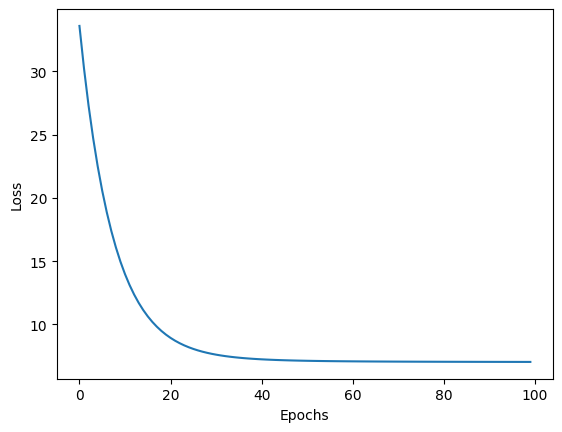

In [11]:
plt.plot(range(epochs) , losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

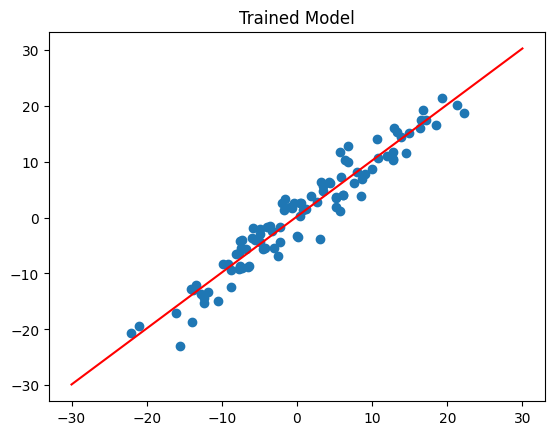

In [12]:
plot_fit('Trained Model')